In [1]:
import pandas as pd
import numpy as np
import math
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
import seaborn as sns
#import pyfolio
import datetime
%matplotlib inline

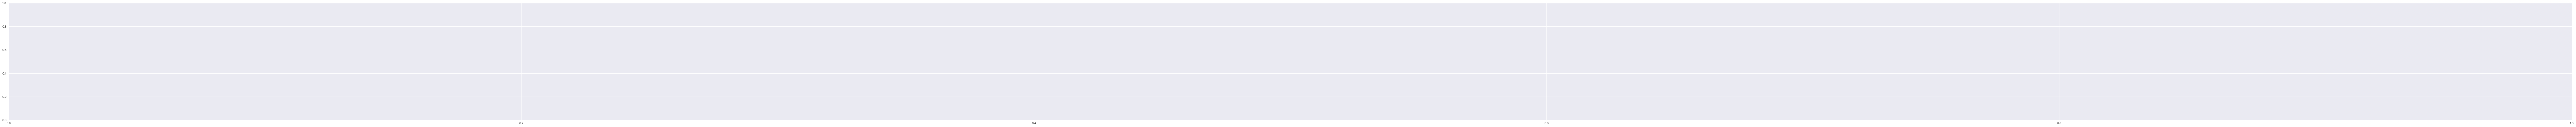

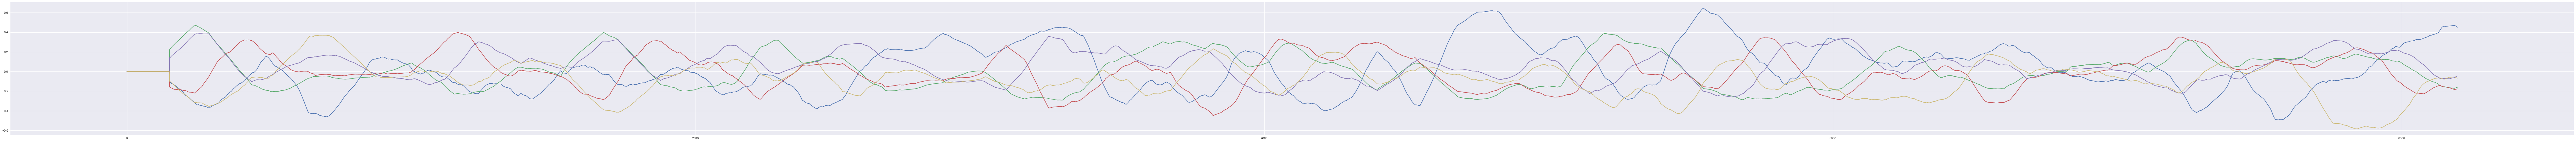

"\n# prevent shift\nfor i in range(ma_period):\n    cur1_avg_delta_ma.insert(i, cur1_avg_delta[i])\n\nprint(len(cur1_avg_delta))\nprint(len(cur1_avg_delta_ma))\n\nax.twinx().plot(cur1_col1[samplesize+1:len(cur2_ratio)+samplesize-1], '#afafaf')\nax.plot(cur1_avg_delta[:len(cur2_ratio)])\nax.plot(cur1_avg_delta_ma)\nax.plot([0]*len(cur2_ratio))\nax.locator_params(nbins=40)\nplt.figure(figsize=(150, 6)).add_subplot(212).plot(cur1_avg_delta_ma_ax)\nplt.plot([0]*len(cur1_avg_delta_ma_ax))\n#ax.plot(ratio_avg, 'r--')\nplt.savefig('EU_ratio_avg.pdf')\n"

In [177]:
# Creates averaged ratios for all symbols
# Not necessary for backtest

fig = plt.figure(figsize = (150, 7))
ax = fig.add_subplot(111)

# Param
ma_period = 150
ax_period = 30

ratio_avg = [(cur1_ratio[i] + cur2_ratio[i] + cur3_ratio[i] + cur4_ratio[i] + cur5_ratio[i])/5 for i in range(len(cur2_ratio))]

cur1_avg_delta = [cur1_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]
cur2_avg_delta = [cur2_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]
cur3_avg_delta = [cur3_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]
cur4_avg_delta = [cur4_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]
cur5_avg_delta = [cur5_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]

cur1_avg_delta_ma = [0]*len(cur1_avg_delta)
cur2_avg_delta_ma = [0]*len(cur2_avg_delta)
cur3_avg_delta_ma = [0]*len(cur3_avg_delta)
cur4_avg_delta_ma = [0]*len(cur4_avg_delta)
cur5_avg_delta_ma = [0]*len(cur5_avg_delta)

for i in range(ma_period, len(cur1_avg_delta_ma)):
    cur1_avg_delta_ma[i] = sum(cur1_avg_delta[i-ma_period:i])/ma_period
    cur2_avg_delta_ma[i] = sum(cur2_avg_delta[i-ma_period:i])/ma_period
    cur3_avg_delta_ma[i] = sum(cur3_avg_delta[i-ma_period:i])/ma_period
    cur4_avg_delta_ma[i] = sum(cur4_avg_delta[i-ma_period:i])/ma_period
    cur5_avg_delta_ma[i] = sum(cur5_avg_delta[i-ma_period:i])/ma_period

cur1_avg_delta_ma_ax = [0]*len(cur1_avg_delta_ma)
for i in range(ax_period, len(cur1_avg_delta_ma_ax)):
    cur1_avg_delta_ma_ax[i] = (cur1_avg_delta_ma[i] - cur1_avg_delta_ma[i-ax_period])/ax_period

    
a = plt.figure(figsize=(150, 8))
b = a.add_subplot(111)
b.plot(cur1_avg_delta_ma)
b.plot(cur2_avg_delta_ma)
b.plot(cur3_avg_delta_ma)
b.plot(cur4_avg_delta_ma)
b.plot(cur5_avg_delta_ma)
plt.show()

'''
# prevent shift
for i in range(ma_period):
    cur1_avg_delta_ma.insert(i, cur1_avg_delta[i])

print(len(cur1_avg_delta))
print(len(cur1_avg_delta_ma))

ax.twinx().plot(cur1_col1[samplesize+1:len(cur2_ratio)+samplesize-1], '#afafaf')
ax.plot(cur1_avg_delta[:len(cur2_ratio)])
ax.plot(cur1_avg_delta_ma)
ax.plot([0]*len(cur2_ratio))
ax.locator_params(nbins=40)
plt.figure(figsize=(150, 6)).add_subplot(212).plot(cur1_avg_delta_ma_ax)
plt.plot([0]*len(cur1_avg_delta_ma_ax))
#ax.plot(ratio_avg, 'r--')
plt.savefig('EU_ratio_avg.pdf')
'''

576204
8397
8397
8397
8397 

8197
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.003535266261469913, -0.0035661347132126607, -0.0036457361228133408, -0.0037442060739067947, -0.0038475682439368312, -0.003930948088397627, -0.0039996730450240969, -0.0040812631722390467, -0.0041433694509860029, -0.0041899005765168411, -0.0042217281699250594, -0.004265792459839754, -0.0043161567472987297, -0.0043666105127646241, -0.0044170618320457673, -0.0044754366956522374, -0.004540978596822399, -0.0046022318063497387, -0.0046543543838285699, -0.0047171724550487456]


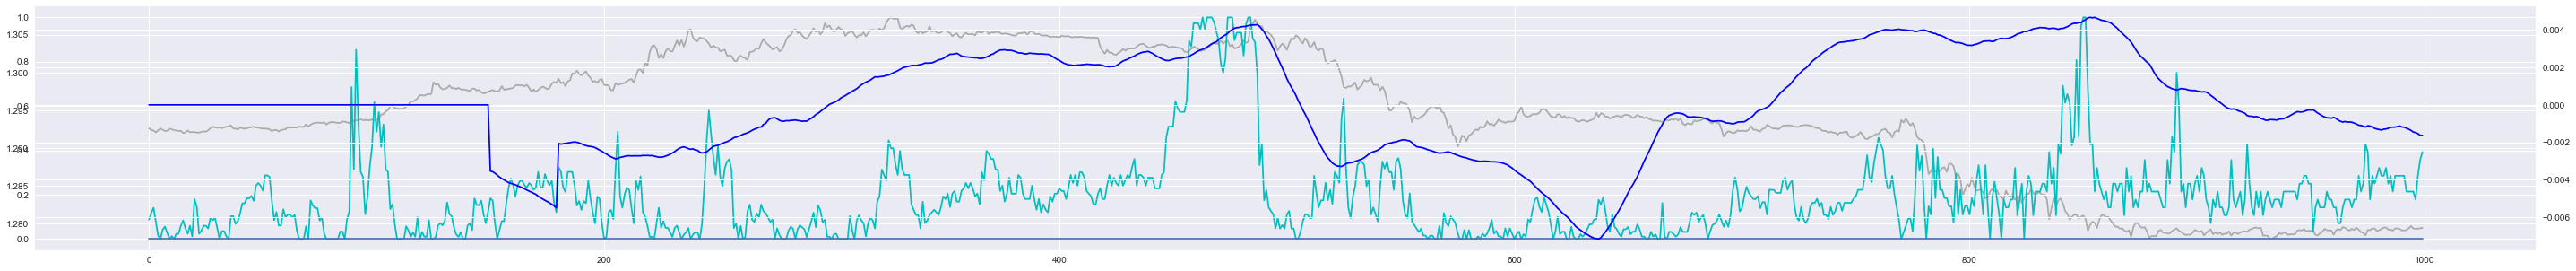

In [178]:
## Visualization

print(len(cur1_col1))
print(len(cur2_col1))
print(len(cur3_col1))
print(len(cur4_col1))
print(len(cur5_col1), '\n')

#print(len(cur1_localmax))
print(len(cur1_avg_delta_ma_ax))
#print(len(cur1_avg_delta_ma), '\n')

#print(len(cur2_col1)-len(cur1_avg_delta_ma))

# Still does not explain the extra 568 shift
#--

fifi = plt.figure(figsize=(50, 5))
aa = fifi.add_subplot(111)
aa.plot(cur1_col1[samplesize:1000+samplesize], '#aaaaaa')
#aa.plot(cur1_localmax[:1000], '#bbbbbb')
#aa.plot(cur1_localmin[:1000], '#bbbbbb')

bb = aa.twinx()
bb.plot(cur1_ratio[:1000], 'c')
#bb.plot(cur1_avg_delta[:1000], 'r')
#bb.plot(cur1_avg_delta_ma[:1000], 'g')
bb.twinx().plot(cur1_avg_delta_ma_ax[:1000], 'b')
bb.plot([0]*1000)
print(cur1_avg_delta_ma_ax[140:170])


In [2]:
# Some functions
# -- 
def sharpe_6m(net_pips, years):
    ret_ = [net_pips[i] - net_pips[i-1] for i in range(1, len(net_pips))]
    
    # trades/years/2 = trades per 6-month span
    n_6m = math.ceil(len(ret_)/years/2)
    
    trailing_mean = [np.mean(ret_[i-n_6m:i]) for i in range(n_6m, len(ret_))]
    trailing_std = [np.std(trailing_mean[i-n_6m:i]) for i in range(n_6m, len(trailing_mean))]
    
    # Compute 6 month trailing Sharpe
    sharpe_6m = [trailing_mean[i]/trailing_std[i] for i in range(len(trailing_std))]
    sharpe_avg = sum(sharpe_6m)/len(sharpe_6m)
    
    return sharpe_6m, sharpe_avg

def load_symbol(filename):
# Load symbol and get quotes, datetimes and volumes
    df_cur = pd.read_csv(filename)
    cur_col1 = df_cur.iloc[:, 4].values
    cur_index = df_cur.iloc[:, 0].values
    cur_volume = df_cur.iloc[:, 5].values
    
    return cur_col1, cur_index, cur_volume

def drop_zeros(cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1, 
               cur1_index, cur2_index, cur3_index, cur4_index, cur5_index, 
               cur1_volume, cur2_volume, cur3_volume, cur4_volume, cur5_volume):
# Drops weekend values for 5 symbols (volume == 0)
# Assumes equal shape of all currency symbol data
    min_len = min(len(cur1_col1), len(cur2_col1), len(cur3_col1), len(cur4_col1), len(cur5_col1))
    #print(min_len)
    
    jj = 0
    
    for j in range(min_len):
        if cur1_volume[j] > 0:
            cur1_col1[jj] = cur1_col1[j]
            cur2_col1[jj] = cur2_col1[j]
            cur3_col1[jj] = cur3_col1[j]
            cur4_col1[jj] = cur4_col1[j]
            cur5_col1[jj] = cur5_col1[j]
            
            cur1_index[jj] = cur1_index[j]
            cur2_index[jj] = cur2_index[j]
            cur3_index[jj] = cur3_index[j]
            cur4_index[jj] = cur4_index[j]
            cur5_index[jj] = cur5_index[j]
            
            cur1_volume[jj] = cur1_volume[j]
            cur2_volume[jj] = cur2_volume[j]
            cur3_volume[jj] = cur3_volume[j]
            cur4_volume[jj] = cur4_volume[j]
            cur5_volume[jj] = cur5_volume[j]
            
            jj += 1

    cur1_col1 = cur1_col1[:jj]
    cur2_col1 = cur2_col1[:jj]
    cur3_col1 = cur3_col1[:jj]
    cur4_col1 = cur4_col1[:jj]
    cur5_col1 = cur5_col1[:jj]
    
    cur1_index = cur1_index[:jj]
    cur2_index = cur2_index[:jj]
    cur3_index = cur3_index[:jj]
    cur4_index = cur4_index[:jj]
    cur5_index = cur5_index[:jj]
    
    cur1_volume = cur1_volume[:jj]
    cur2_volume = cur2_volume[:jj]
    cur3_volume = cur3_volume[:jj]
    cur4_volume = cur4_volume[:jj]
    cur5_volume = cur5_volume[:jj]
    
    return (cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1, 
            cur1_index, cur2_index, cur3_index, cur4_index, cur5_index, 
            cur1_volume, cur2_volume, cur3_volume, cur4_volume, cur5_volume)

def record_open_data(type_, open_rates, entryvals, typevals, x, cur1_col1, samplesize): # 0 or 1
    tradetype = type_
    trade = 1 # Keeping track of both trades simultaneously, also allows different stops/targets
    open_rates[0] = cur1_col1[x+samplesize]

    # Trades = open
    entryvals.append(x) #entryvals[ev] = x # Store position in delta array
    typevals.append(type_) # For line coloring in backtest visualization

    return trade, tradetype, open_rates, entryvals, typevals

def record_close_data(typeval, exitvals, net_pips_1, x, cur1_col1, samplesize):
    if typeval == 0: 
        net_pips_1.append(net_pips_1[-1] + math.ceil((cur1_col1[samplesize+x] - open_rates[0])*10000))
        #net_pips_1.append(net_pips_1[-1] + math.ceil((open_rates[0] - cur1_col1[samplesize+x])*10000))
    else:
        net_pips_1.append(net_pips_1[-1] + math.ceil((open_rates[0] - cur1_col1[samplesize+x])*10000))
        #net_pips_1.append(net_pips_1[-1] + math.ceil((cur1_col1[samplesize+x] - open_rates[0])*10000))
        
    trade = 0
    exitvals.append(x)
    
    return net_pips_1, trade, exitvals

# Currently unused
def simple_progress_bar(cur1_col1, samplesize):
    # Simple progress bar
    # Run every iteration
    if i % (math.floor((len(cur1_col1)-1-samplesize)/10)) == 0:
        print('+ '*math.ceil(((len(cur1_col1)-1-samplesize)/10/i)**-1),
              '- '*(10-math.ceil(((len(cur1_col1)-1-samplesize)/10/i)**-1)), sep='')

# --
# Ratio functions ahead

# Pass empty cur_localmax to function
# cur_localmax has equal shape as cur_col1
def get_localmax(cur_col1, cur_localmax, samplesize):
    
    cur_localmax[samplesize] = float(max(cur_col1[:samplesize-1]))
   
    for i in range(samplesize + 1, len(cur_col1)):
        if cur_col1[i] > cur_localmax[i-1]:
            cur_localmax[i] = cur_col1[i]
        elif cur_localmax[i-1] == cur_col1[i-samplesize-1]:
            cur_localmax[i] = float(max(cur_col1[i-samplesize:i-1]))
        else:
            cur_localmax[i] = cur_localmax[i-1]

    return cur_localmax

# Pass empty cur_localmin to function
def get_localmin(cur_col1, cur_localmin, samplesize):
    cur_localmin[samplesize] = float(min(cur_col1[:samplesize-1]))
   
    for i in range(samplesize + 1, len(cur_col1)):
        if cur_col1[i] < cur_localmin[i-1]:
            cur_localmin[i] = cur_col1[i]
        elif cur_localmin[i-1] == cur_col1[i-samplesize-1]:
            cur_localmin[i] = float(min(cur_col1[i-samplesize:i-1]))
        else:
            cur_localmin[i] = cur_localmin[i-1]

    return cur_localmin

def clean_ratio(ratio):
# Prevent ratio !E {[0,1]}
    for i in range(len(ratio)):
        if ratio[i] > 1:
            ratio[i] = 1
        elif ratio[i] < 0:
            ratio[i] = 1
        else:
            ratio[i] = ratio[i]

    return ratio

def get_ratio(cur_col1, samplesize):
# cur_col1 has to be initialized previously
    # Speed measuring
    ping = time.process_time()
    
    cur_localmin = [0]*len(cur_col1)
    cur_localmin = get_localmin(cur_col1, cur_localmin, samplesize)
    cur_localmax = [0]*len(cur_col1)
    cur_localmax = get_localmax(cur_col1, cur_localmax, samplesize)

    ratio = [(cur_col1[i] - cur_localmin[i])/
             (cur_localmax[i] - cur_localmin[i]) 
             for i in range(samplesize, len(cur_col1))] 
    ratio = clean_ratio(ratio)

    pong = time.process_time()
    print(pong-ping, 'seconds elapsed\n')

    return ratio

def create_ratios(samplesize, cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1):
# Creates ratios for 5 symbols
    #cur_arr = [get_ratio(cur, samplesize) for cur in curs]
    cur1_ratio = get_ratio(cur1_col1, samplesize)
    cur2_ratio = get_ratio(cur2_col1, samplesize)
    cur3_ratio = get_ratio(cur3_col1, samplesize)
    cur4_ratio = get_ratio(cur4_col1, samplesize)
    cur5_ratio = get_ratio(cur5_col1, samplesize)
    
    return (cur1_ratio, cur2_ratio, cur3_ratio, cur4_ratio, cur5_ratio)

def get_avg_delta_ma_ax(ma_period, ax_period, cur1_ratio, cur2_ratio, cur3_ratio, cur4_ratio, cur5_ratio):
    ratio_avg = [(cur1_ratio[i] + cur2_ratio[i] + cur3_ratio[i] + cur4_ratio[i] + cur5_ratio[i])/5 for i in range(len(cur1_ratio))]
    cur1_avg_delta = [cur1_ratio[i] - ratio_avg[i] for i in range(len(ratio_avg))]
    cur1_avg_delta_ma = [0]*len(cur1_avg_delta)

    for i in range(ma_period, len(cur1_avg_delta_ma)):
        cur1_avg_delta_ma[i] = sum(cur1_avg_delta[i-ma_period:i])/ma_period

    cur1_avg_delta_ma_ax = [0]*len(cur1_avg_delta_ma)
    for i in range(ax_period, len(cur1_avg_delta_ma_ax)):
        cur1_avg_delta_ma_ax[i] = (cur1_avg_delta_ma[i] - cur1_avg_delta_ma[i-ax_period])/ax_period
    
    return cur1_avg_delta_ma_ax #, cur1_avg_delta, cur1_avg_delta_ma #(if needed)

In [3]:
def consecutive_growth(cur_volume, samplesize):
    volume_ratio = get_ratio(cur_volume, samplesize)
    volume_ratio_diff = [volume_ratio[i] - volume_ratio[i-1] for i in range(1, len(volume_ratio))]
    '''
    for i in range(len(volume_ratio_diff)):
        if volume_ratio[i] < 0.5:
            volume_ratio_diff[i] = 0
    '''
    # Counts consecutive positive increments in volume
    # count_max list for easier chart viewing 
    count_max = [0]*len(volume_ratio_diff)
    count = [0]*len(volume_ratio_diff)
    for i in range(1, len(volume_ratio_diff)):
        if volume_ratio_diff[i] > volume_ratio_diff[i-1]:
            count[i] = count[i-1] + 1
        else:
            count[i] = 0
            count_max[i] = count[i-1]
            
    return count_max

In [91]:
cur1_col1, cur1_index, cur1_volume = load_symbol('data/EURUSD_Candlestick_5_m_BID_02.01.2012-26.06.2017.csv')
cur2_col1, cur2_index, cur2_volume = load_symbol('data/EURCHF_Candlestick_5_m_BID_02.01.2012-26.06.2017.csv')
cur3_col1, cur3_index, cur3_volume = load_symbol('data/EURUSD_Candlestick_5_m_BID_02.01.2012-26.06.2017.csv')
cur4_col1, cur4_index, cur4_volume = load_symbol('data/EURNZD_Candlestick_5_m_BID_02.01.2012-26.06.2017.csv')
cur5_col1, cur5_index, cur5_volume = load_symbol('data/EURAUD_Candlestick_5_m_BID_02.01.2012-26.06.2017.csv')

(cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1, 
cur1_index, cur2_index, cur3_index, cur4_index, cur5_index, 
cur1_volume, cur2_volume, cur3_volume, cur4_volume, cur5_volume) = drop_zeros(cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1, 
                                                                              cur1_index, cur2_index, cur3_index, cur4_index, cur5_index, 
                                                                              cur1_volume, cur2_volume, cur3_volume, cur4_volume, cur5_volume)

In [ ]:
# Getting R^2 value
pi = 3.14159265
model = LinearRegression()
X = np.array([math.sin(x) for x in range(1000)]).reshape(-1, 1)
y = np.array([math.cos(x+(3*pi)/2) for x in range(1000)]).reshape(-1, 1)
model.fit(X, y)
r_squared = model.score(X, y)
print(r_squared)

1.96875 seconds elapsed

409060


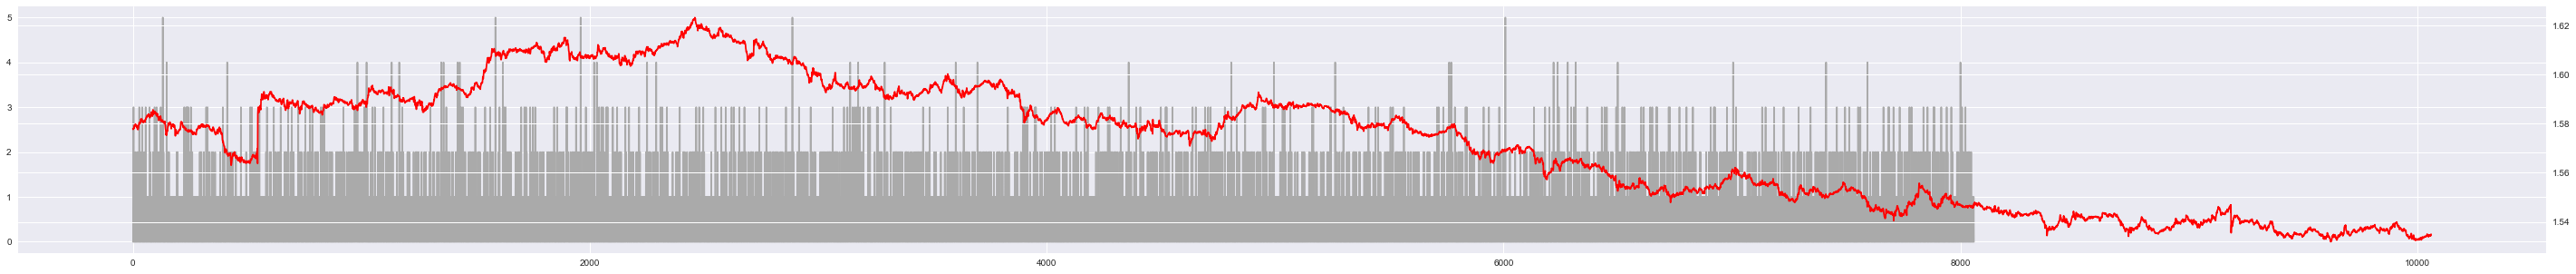

In [84]:
fig = plt.figure(figsize=(50, 5))
a = fig.add_subplot(111)

ssize = 1000

volume_ratio = get_ratio(cur1_volume, ssize)
#a.plot(volume_ratio, '#aaaaaa')

volume_ratio_diff = [volume_ratio[i] - volume_ratio[i-1] for i in range(1, len(volume_ratio))]
'''
for i in range(len(volume_ratio_diff)):
    if volume_ratio[i] < 0.5:
        volume_ratio_diff[i] = 0
'''
# Counts consecutive positive increments in volume
# count max list for easier chart viewing 
count_max = [0]*len(volume_ratio_diff)
count = [0]*len(volume_ratio_diff)
for i in range(1, len(volume_ratio_diff)):
    if volume_ratio_diff[i] > volume_ratio_diff[i-1]:
        count[i] = count[i-1] + 1
    else:
        count[i] = 0
        count_max[i] = count[i-1]

#a.plot(volume_ratio_diff, '#aaaaaa')
a.plot(count_max[400000+ssize:], '#aaaaaa')
#a.plot([0.9]*(10000-ssize), 'w--')
#a.plot(cur1_volume[200:1000])
a.twinx().plot(cur1_col1[400000:], 'r')
print(len(count_max))

In [92]:
'''
VOLUME test strat
Every array except for raw quotes are adjusted
shift cur1_col1 by samplesize when calculating
'''
# Optimization
pip_arr = [0]

# Params
class self():
    pass

self.ax_threshold = -0.0001
self.target = 0.0
self.stop = 0.00

self.ma_period = 20
self.ax_period = 10
self.n_count = 2
self.samplesize = 1500

optimize = 1
# --

samplesize = self.samplesize
n_count = self.n_count
for t in range(2):
    if optimize:
        n_count += 1
    
    ma_period = self.ma_period
    for u in range(4):
        if optimize:
            ma_period += 10
        
        samplesize = self.samplesize
        for v in range(5):
            if optimize:
                samplesize += 250
                
            count_max = consecutive_growth(cur1_volume, samplesize)
            
            stop = self.stop
            for w in range(3):
                if optimize:
                    stop += 0.005
                    
                target = self.target
                for z in range(3):
                    if optimize:
                        target += 0.005
                        

                    trade = 0
                    entryvals = []
                    exitvals = []
                    typevals = []
                    open_rates = [0]*2
                    net_pips_1 = [0]
                    
                    #
                    print('samplesize: %.0f\nma_p: %.0f\ntp/sl: %.3f' % (samplesize, ma_period, target))
                    #
                        

                    for x in range(1, len(count_max)):
                        # if all closed
                        if trade == 0:
                            # Buy (tradetype 1)
                            if count_max[x-1] >= n_count and sum(cur1_col1[x-ma_period+samplesize:x+samplesize])/ma_period > cur1_col1[x]:
                                trade, tradetype, open_rates, entryvals, typevals = record_open_data(1, open_rates,
                                                                                                     entryvals, typevals, 
                                                                                                     x, cur1_col1, samplesize)

                            # Sell (tradetype 0)
                            elif count_max[x-1] >= n_count and sum(cur1_col1[x-ma_period+samplesize:x+samplesize])/ma_period < cur1_col1[x]:
                                trade, tradetype, open_rates, entryvals, typevals = record_open_data(0, open_rates, 
                                                                                                     entryvals, typevals, 
                                                                                                     x, cur1_col1, samplesize)

                        # if > 0 open
                        else: 
                            # Buy order
                            if tradetype: # == 1:
                                if ((count_max[x-1] >= n_count-1 and x - entryvals[-1] >= ma_period and sum(cur1_col1[x-ma_period+samplesize:x+samplesize])/ma_period < cur1_col1[x]) 
                                   #((count_max[x-1] >= n_count and entryvals[-1] - x >= ma_period and sum(cur1_col1[x-ma_period+samplesize:x+samplesize])/ma_period < cur1_col1[x]) 
                                    or cur1_col1[samplesize+x] >= open_rates[0] + target
                                    or cur1_col1[samplesize+x] <= open_rates[0] - stop):
                                    
                                    # Close trade and store data
                                    #print('x_0: %.0f, x_1: %.0f' % (entryvals[-1], x))
                                    net_pips_1, trade, exitvals = record_close_data(tradetype, exitvals, 
                                                                                    net_pips_1, x, cur1_col1, samplesize)

                            # Sell order
                            else:
                                if ((count_max[x-1] >= n_count-1 and x - entryvals[-1] >= ma_period and sum(cur1_col1[x-ma_period+samplesize:x+samplesize])/ma_period > cur1_col1[x]) 
                                    #((count_max[x-1] >= n_count and entryvals[-1] - x >= ma_period and sum(cur1_col1[x-ma_period+samplesize:x+samplesize])/ma_period > cur1_col1[x]) 
                                    or cur1_col1[samplesize+x] <= open_rates[0] - target
                                    or cur1_col1[samplesize+x] >= open_rates[0] + stop):
                                    
                                    # Close trade and store data
                                    net_pips_1, trade, exitvals = record_close_data(tradetype, exitvals, 
                                                                                    net_pips_1, x, cur1_col1, samplesize)

                    net_pips_1 = [net_pips_1[i] - 2*i for i in range(len(net_pips_1))]
                    #net_pips_1 = [net_pips_1[i] - 30*i for i in range(len(net_pips_1))]
                    #pip_arr.append(net_pips_1[-1])

                    if optimize:
                        # Getting R^2 value
                        model = LinearRegression()
                        X = np.array([i for i in range(len(net_pips_1))]).reshape(-1, 1)
                        y = net_pips_1
                        model.fit(X, y)
                        r_squared = model.score(X, y)        
                        print('R^2: %.3f, pips: %.1f' % (r_squared, net_pips_1[-1]))

                        fig = plt.figure(figsize=(10, 5))
                        ccc = fig.add_subplot(111)
                        plt.plot(net_pips_1)
                        TITLENAME = 'R^2: %.4f, pips: %.1f, target: %.4f, stop: %.4f\nma_period: %.1f, samplesize: %.1f, n_count: %.0f' % (r_squared, net_pips_1[-1], target, stop, ma_period, samplesize, n_count)

                        # If score is negative e.g. loss, picture is rated by possible net if the strategy is reversed
                        # Positive backtests are penalized for having low R^2-values: S*(1-R_S^2)^-1
                        if net_pips_1[-1] <= 0:
                            IMGNAME = 'data/bt_imgs/EURUSD_5m_volume/min/net_%.2f_%.1f_%.3f.png' % ((-(net_pips_1[-1] + 2*len(net_pips_1)) - 2*len(net_pips_1)), net_pips_1[-1], r_squared)
                        else:
                            IMGNAME = 'data/bt_imgs/EURUSD_5m_volume/max/net_%.2f_%.1f_%.3f.png' % (net_pips_1[-1]/(1-r_squared), net_pips_1[-1], r_squared)
                        plt.title(TITLENAME)
                        plt.savefig(IMGNAME)
                        plt.close(fig)

if optimize == 0:     
    plt.figure(figsize=(15, 8))
    plt.plot(net_pips_1, linewidth=2.0, color='r')
    print('final pip val:', net_pips_1[-1])
    net_pips_1 = [net_pips_1[i] + 2*i for i in range(len(net_pips_1))]
    #net_pips_1 = [net_pips_1[i] + 30*i for i in range(len(net_pips_1))]
    plt.plot(net_pips_1, 'k')
    plt.title('Cumulative pip-gain')
    red_patch = mpatches.Patch(color='r', label='net gain')
    black_patch = mpatches.Patch(color='k', label='gross gain')
    plt.legend(handles=[red_patch, black_patch])


1.875 seconds elapsed

samplesize: 1750
ma_p: 30
tp/sl: 0.005
R^2: 0.643, pips: -2302.0
samplesize: 1750
ma_p: 30
tp/sl: 0.010
R^2: 0.496, pips: -1636.0
samplesize: 1750
ma_p: 30
tp/sl: 0.015
R^2: 0.397, pips: -1356.0
samplesize: 1750
ma_p: 30
tp/sl: 0.005
R^2: 0.590, pips: -1847.0
samplesize: 1750
ma_p: 30
tp/sl: 0.010
R^2: 0.214, pips: -1285.0
samplesize: 1750
ma_p: 30
tp/sl: 0.015
R^2: 0.356, pips: -1272.0
samplesize: 1750
ma_p: 30
tp/sl: 0.005
R^2: 0.501, pips: -1747.0
samplesize: 1750
ma_p: 30
tp/sl: 0.010
R^2: 0.365, pips: -1396.0
samplesize: 1750
ma_p: 30
tp/sl: 0.015
R^2: 0.260, pips: -1227.0
1.78125 seconds elapsed

samplesize: 2000
ma_p: 30
tp/sl: 0.005
R^2: 0.240, pips: -593.0
samplesize: 2000
ma_p: 30
tp/sl: 0.010
R^2: 0.134, pips: -609.0
samplesize: 2000
ma_p: 30
tp/sl: 0.015
R^2: 0.202, pips: -753.0
samplesize: 2000
ma_p: 30
tp/sl: 0.005
R^2: 0.624, pips: -1495.0
samplesize: 2000
ma_p: 30
tp/sl: 0.010
R^2: 0.249, pips: -876.0
samplesize: 2000
ma_p: 30
tp/sl: 0.015
R^2: 0.

Avg. Sharpe: 1.25
R^2: 0.134, m: 0.002


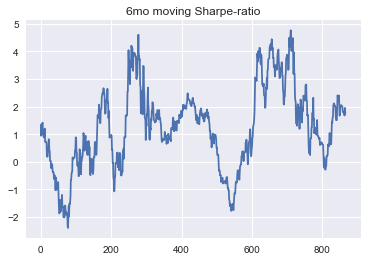

In [90]:
net_pips_1_ = [net_pips_1[i] - 2*i for i in range(len(net_pips_1))]
plt.plot(sharpe_6m(net_pips_1_, 5)[0])
plt.title('6mo moving Sharpe-ratio')
print('Avg. Sharpe: %.2f' % sharpe_6m(net_pips_1_, 5)[1])

##
model = LinearRegression()
X = np.array([i for i in range(len(sharpe_6m(net_pips_1_, 5)[0]))]).reshape(-1, 1)
y = sharpe_6m(net_pips_1_, 5)[0]
model.fit(X, y)
r_squared = model.score(X, y)        
print('R^2: %.3f, m: %.3f' % (r_squared, model.coef_))

[17, 496, 712, 977, 1336, 1676, 1982, 3759, 3934, 4231]
[495, 693, 965, 1326, 1631, 1957, 3706, 3906, 4218, 4364]


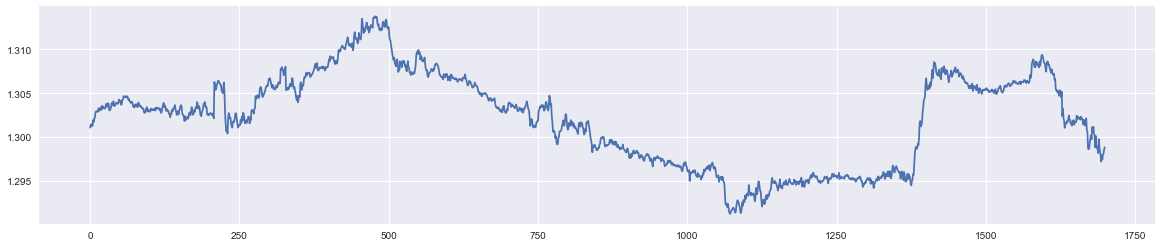

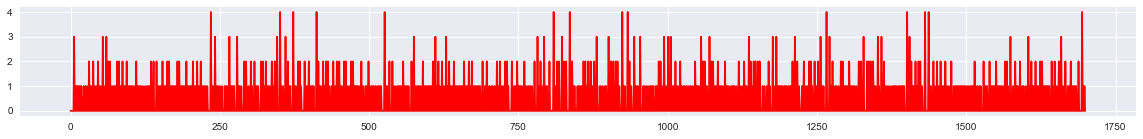

In [38]:
print(entryvals[:10])
print(exitvals[:10])
fig = plt.figure(figsize=(20, 4))
a = fig.add_subplot(111)
a.plot(cur1_col1[ssize + 100: 1800 + ssize])
#a.plot((166, 166), (1.21, 1.2194), 'k')
#a.plot((1090, 1090), (1.21, 1.2194), 'k')
b = plt.figure(figsize=(20, 2)).add_subplot(111)
b.plot(count_max[ssize + 100: 1800 + ssize], 'r')


In [100]:
'''
Every array except for raw quotes are adjusted
shift cur1_col1 by samplesize when calculating
'''
# Optimization
pip_arr = [0]

# Params
class self():
    pass

self.ax_threshold = -0.0001
self.target = 0.001
self.stop = 0.001

self.ma_period = 800
self.ax_period = 40
self.samplesize = 2000

optimize = 0
# --

samplesize = self.samplesize

for t in range(5):
    if optimize:
        samplesize += 100
        
    cur1_ratio, cur2_ratio, cur3_ratio, cur4_ratio, cur5_ratio = create_ratios(samplesize, cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1)
    
    ma_period = self.ma_period

    for u in range(7):
        if optimize:
            ma_period += 200

        ax_period = self.ax_period

        for v in range(3):
            if optimize:
                ax_period += 10

            cur1_avg_delta_ma_ax = get_avg_delta_ma_ax(ma_period, ax_period, 
                                                       cur1_ratio, cur2_ratio, 
                                                       cur3_ratio, cur4_ratio, 
                                                       cur5_ratio)
            ax_threshold = self.ax_threshold

            for w in range(2):
                if optimize:
                    ax_threshold += 0.0001
                
                target = self.target
                stop = self.stop
                
                for z in range(1):
                    if optimize:
                        target += 0.005
                        stop += 0.005

                    trade = 0
                    entryvals = []
                    exitvals = []
                    typevals = []
                    open_rates = [0]*2
                    net_pips_1 = [0]
                    
                    #
                    print('samplesize: %.0f\nma_p: %.0f\nax_p: %.0f\nax_thres: %.4f\ntp/sl: %.3f' % (samplesize, ma_period, ax_period, ax_threshold, target))
                    #
                        

                    for x in range(ma_period + ax_period, len(cur1_avg_delta_ma_ax)):
                        # if all closed
                        if trade == 0:
                            # Buy (tradetype 1)
                            if cur1_avg_delta_ma_ax[x] >= ax_threshold:
                                trade, tradetype, open_rates, entryvals, typevals = record_open_data(1, open_rates,
                                                                                                     entryvals, typevals, 
                                                                                                     x, cur1_col1, samplesize)

                            # Sell (tradetype 0)
                            elif cur1_avg_delta_ma_ax[x] <= -ax_threshold:
                                trade, tradetype, open_rates, entryvals, typevals = record_open_data(0, open_rates, 
                                                                                                     entryvals, typevals, 
                                                                                                     x, cur1_col1, samplesize)

                        # if > 0 open
                        else: 
                            # Buy order
                            if tradetype: # == 1:
                                if (cur1_avg_delta_ma_ax[x] <= 0
                                   or cur1_col1[samplesize+x] >= open_rates[0] + target
                                   or cur1_col1[samplesize+x] <= open_rates[0] - stop):

                                    net_pips_1, trade, exitvals = record_close_data(tradetype, exitvals, 
                                                                                    net_pips_1, x, cur1_col1, samplesize)

                            # Sell order
                            else:
                                if (cur1_avg_delta_ma_ax[x] >= 0
                                   or cur1_col1[samplesize+x] <= open_rates[0] - target
                                   or cur1_col1[samplesize+x] >= open_rates[0] + stop):

                                    net_pips_1, trade, exitvals = record_close_data(tradetype, exitvals, 
                                                                                    net_pips_1, x, cur1_col1, samplesize)

                    net_pips_1 = [net_pips_1[i] - 2*i for i in range(len(net_pips_1))]
                    #pip_arr.append(net_pips_1[-1])

                    if optimize:
                        # Getting R^2 value
                        model = LinearRegression()
                        X = np.array([i for i in range(len(net_pips_1))]).reshape(-1, 1)
                        y = net_pips_1
                        model.fit(X, y)
                        r_squared = model.score(X, y)        
                        print('R^2: %.3f, pips: %.1f' % (r_squared, net_pips_1[-1]))

                        fig = plt.figure(figsize=(10, 5))
                        ccc = fig.add_subplot(111)
                        plt.plot(net_pips_1)
                        TITLENAME = 'R^2: %.4f, pips: %.1f, ax_threshold: %.5f, target: %.4f, stop: %.4f\nma_period: %.1f, ax_period: %.1f, samplesize: %.1f' % (r_squared, net_pips_1[-1], ax_threshold,
                                                                                                                                                                 target, stop, ma_period, 
                                                                                                                                                                 ax_period, samplesize)

                        # If score is negative e.g. loss, picture is assigned 'a' and sorted to the bottom of the file by OS.
                        if net_pips_1[-1] <= 0:
                            IMGNAME = 'data/bt_imgs/EURAUD_5m_2012-2017/min/net_%.2f_%.1f_%.3f.png' % ((-(net_pips_1[-1] + 2*len(net_pips_1)) - 2*len(net_pips_1)), net_pips_1[-1], r_squared)
                        else:
                            IMGNAME = 'data/bt_imgs/EURAUD_5m_2012-2017/max/net_%.2f_%.1f_%.3f.png' % (net_pips_1[-1]/(1-r_squared), net_pips_1[-1], r_squared)
                        plt.title(TITLENAME)
                        plt.savefig(IMGNAME)
                        plt.close(fig)

if optimize == 0:     
    plt.figure(figsize=(15, 8))
    plt.plot(net_pips_1, linewidth=2.0, color='r')
    print('final pip val:', net_pips_1[-1])
    net_pips_1 = [net_pips_1[i] + 2*i for i in range(len(net_pips_1))]
    plt.plot(net_pips_1, 'k')
    plt.title('Cumulative pip-gain')
    red_patch = mpatches.Patch(color='r', label='net gain')
    black_patch = mpatches.Patch(color='k', label='gross gain')
    plt.legend(handles=[red_patch, black_patch])


4.0625 seconds elapsed

3.890625 seconds elapsed

3.8125 seconds elapsed

3.90625 seconds elapsed

3.421875 seconds elapsed



KeyboardInterrupt: 

In [ ]:
'''
Every array except for raw quotes are adjusted
shift cur1_col1 by samplesize when calculating
'''

# Optimization
pip_arr = [0]

# Params in tuple-form for optimization
class self():
    pass

self.ax_threshold = np.arange(0.0005, 0.0006, 0.001) #(0.0002, 0.0005, 0.0001) 
self.target = np.arange(0.009, 0.01, 0.005) #(0.005, 0.015, 0.005)
self.stop = np.arange(0.009, 0.01, 0.005) #(0.005, 0.015, 0.005)
self.ma_period = np.arange(800, 900, 1000) #(100, 900, 100)
self.ax_period = np.arange(55, 65, 100) #(35, 65, 10)
self.samplesize = np.arange(300, 400, 1000) #(100, 1900, 150)
self.optimize = False

# > reduce to tuple input for loops
# > fix var optimize to all boolean
# --

def run_backtest(self, cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1):

    for samplesize in self.samplesize:
        cur1_ratio, cur2_ratio, cur3_ratio, cur4_ratio, cur5_ratio = create_ratios(samplesize, cur1_col1, 
                                                                                   cur2_col1, cur3_col1, 
                                                                                   cur4_col1, cur5_col1)

        for ma_period in self.ma_period:
            
            for ax_period in self.ax_period:
                cur1_avg_delta_ma_ax = get_avg_delta_ma_ax(ma_period, ax_period, 
                                                           cur1_ratio, cur2_ratio, 
                                                           cur3_ratio, cur4_ratio, 
                                                           cur5_ratio)
                #
                print(cur1_avg_delta_ma_ax[990:1020])
                #
                
                for ax_threshold in self.ax_threshold:
                    
                    for target in self.target: #self.stop
                        stop = target

                        trade = 0
                        entryvals = []
                        exitvals = []
                        typevals = []
                        open_rates = [0]*2
                        net_pips_1 = [0]
                        
                        #
                        print('samplesize: %.0f\nma_p: %.0f\nax_p: %.0f\nax_thres: %.4f\ntp/sl: %.3f' % (samplesize, ma_period, ax_period, ax_threshold, target))
                        #
                        
                        for x in range(len(cur1_avg_delta_ma_ax)):
                            # if all closed
                            if trade == 0:
                                # Buy (tradetype 1)
                                if cur1_avg_delta_ma_ax[x] >= ax_threshold:
                                    trade, tradetype, open_rates, entryvals, typevals = record_open_data(1, open_rates,
                                                                                                         entryvals, typevals, 
                                                                                                         x, cur1_col1, samplesize)
                                    #print(cur1_col1[x])
                                # Sell (tradetype 0)
                                elif cur1_avg_delta_ma_ax[x] <= -ax_threshold:
                                    trade, tradetype, open_rates, entryvals, typevals = record_open_data(0, open_rates, 
                                                                                                         entryvals, typevals, 
                                                                                                         x, cur1_col1, samplesize)
                            # if > 0 open
                            else: 
                                # Buy order
                                if tradetype: # == 1:
                                    if (cur1_avg_delta_ma_ax[x] <= 0
                                       or cur1_col1[samplesize+x] >= open_rates[0] + target
                                       or cur1_col1[samplesize+x] <= open_rates[0] - stop):

                                        net_pips_1, trade, exitvals = record_close_data(tradetype, exitvals, 
                                                                                        net_pips_1, x, cur1_col1, samplesize)

                                # Sell order
                                else:
                                    if (cur1_avg_delta_ma_ax[x] >= 0
                                       or cur1_col1[samplesize+x] <= open_rates[0] - target
                                       or cur1_col1[samplesize+x] >= open_rates[0] + stop):

                                        net_pips_1, trade, exitvals = record_close_data(tradetype, exitvals, 
                                                                                        net_pips_1, x, cur1_col1, samplesize)

                        net_pips_1 = [net_pips_1[i] - 2*i for i in range(len(net_pips_1))]
                        #pip_arr.append(net_pips_1[-1])

                        if self.optimize:
                            # Getting R^2 value
                            model = LinearRegression()
                            X = np.array([i for i in range(len(net_pips_1))]).reshape(-1, 1)
                            y = net_pips_1
                            model.fit(X, y)
                            r_squared = model.score(X, y)        
                            print('R^2: %.3f, pips: %.1f' % (r_squared, net_pips_1[-1]))

                            fig = plt.figure(figsize=(10, 5))
                            ccc = fig.add_subplot(111)
                            plt.plot(net_pips_1)
                            TITLENAME = 'R^2: %.4f, pips: %.1f, ax_threshold: %.5f, target: %.4f, stop: %.4f\nma_period: %.1f, ax_period: %.1f, samplesize: %.1f' % (r_squared, net_pips_1[-1], ax_threshold,
                                                                                                                                                                     target, stop, ma_period, 
                                                                                                                                                                     ax_period, samplesize)

                            # If score is negative e.g. loss, picture is assigned 'a' and sorted to the bottom of the file by OS.
                            if net_pips_1[-1] <= 0:
                                IMGNAME = 'data/bt_imgs/EURUSD_test/min/net_%.2f_%.1f_%.3f.png' % ((-(net_pips_1[-1] + 2*len(net_pips_1)) - 2*len(net_pips_1)), net_pips_1[-1], r_squared)
                            else:
                                IMGNAME = 'data/bt_imgs/EURUSD_test/max/net_%.2f_%.1f_%.3f.png' % (net_pips_1[-1]/(1-r_squared), net_pips_1[-1], r_squared)
                            plt.title(TITLENAME)
                            plt.savefig(IMGNAME)
                            plt.close(fig)

    if not self.optimize:     
        plt.figure(figsize=(15, 8))
        plt.plot(net_pips_1, linewidth=2.0, color='r')
        print('final pip val:', net_pips_1[-1])
        net_pips_1 = [net_pips_1[i] + 2*i for i in range(len(net_pips_1))]
        plt.plot(net_pips_1, 'k')
        plt.title('Cumulative pip-gain')
        red_patch = mpatches.Patch(color='r', label='net gain')
        black_patch = mpatches.Patch(color='k', label='gross gain')
        plt.legend(handles=[red_patch, black_patch])


1.2812
1.31371
1.3069600000000001
1.3331
1.3868
1.36665
1.28369
1.06366
1.10839
1.0941
1.11976
1.1018299999999999


C:\Users\Eier\Anaconda3\lib\site-packages\ipykernel\__main__.py:133: RuntimeWarning: divide by zero encountered in double_scalars


1.046875 seconds elapsed

1.30386
1.29357
1.34117
1.38896
1.47835
1.48645
1.44518
1.35944
1.45377
1.5245
1.45921
1.45763
1.125 seconds elapsed

1.2989
1.27263
1.27243
1.4984
1.55545
1.47842
1.4646
1.39616
1.51726
1.51969
1.55272
1.4396799999999998
1.0625 seconds elapsed

1.20576
1.21092
1.23738
1.23791
1.23186
1.22326
1.20774
1.0668600000000001
1.09145
1.08947
1.1077299999999999
1.08615
1.03125 seconds elapsed

0.80937
0.81357
0.8789
0.8704700000000001
0.83802
0.81401
0.7981
0.72465
0.71166
0.74125
0.76831
0.9010799999999999
1.140625 seconds elapsed

[0.00047023450013025707, 0.00047207902501306511, 0.00047405701330805838, 0.00047596140943444745, 0.00047783220512744506, 0.00047952620682582348, 0.00047704699272528117, 0.00047333401472843462, 0.00046965087467264064, 0.0004650986688452942, 0.00046247637652481997, 0.00046036119538675658, 0.0004577117554434003, 0.00045583967872354209, 0.00045326755195218408, 0.00045132451038999911, 0.00044920212787668428, 0.00044744016234078471, 0.0004455380

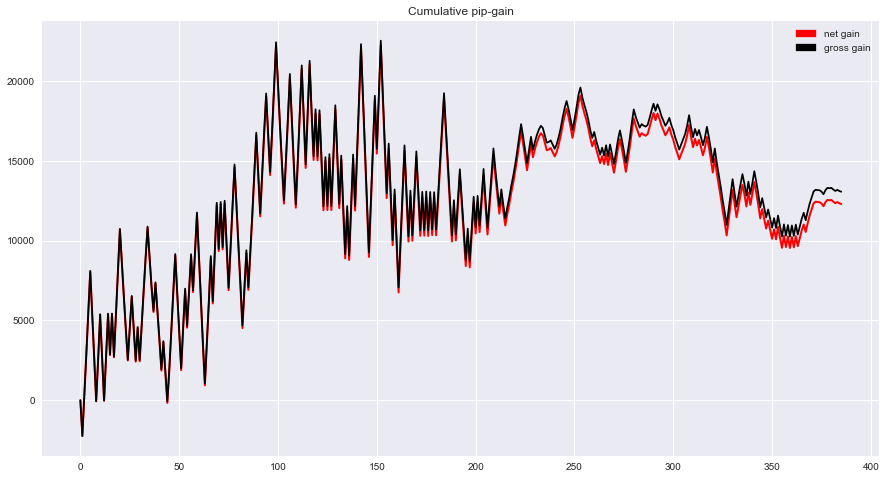

In [125]:
run_backtest(self, cur1_col1, cur2_col1, cur3_col1, cur4_col1, cur5_col1)

In [ ]:
print(self.ax_threshold,
self.target,
self.stop,
self.ma_period,
self.ax_period,
self.samplesize)

aa = np.arange(0.01, 1, 0.01)
print(aa)

print(self.optimize)